In [32]:
import torch
import matplotlib.pyplot as plt
from speech_distances.distributional import FrechetDistance, MMD

plt.style.use('ggplot')

### Distance between tensor and its copy with noise should be small

In [48]:
noise_range = [10, 1, 1e-1, 1e-2]
n, d = 100, 100

In [49]:
mmds = []
frechets = []

for eps in noise_range:
    X =  torch.randn((n, d))
    Y = X + eps * torch.randn((n, d))
    frechets.append(FrechetDistance.distance(X, Y))
    mmds.append(MMD.distance(X, Y))

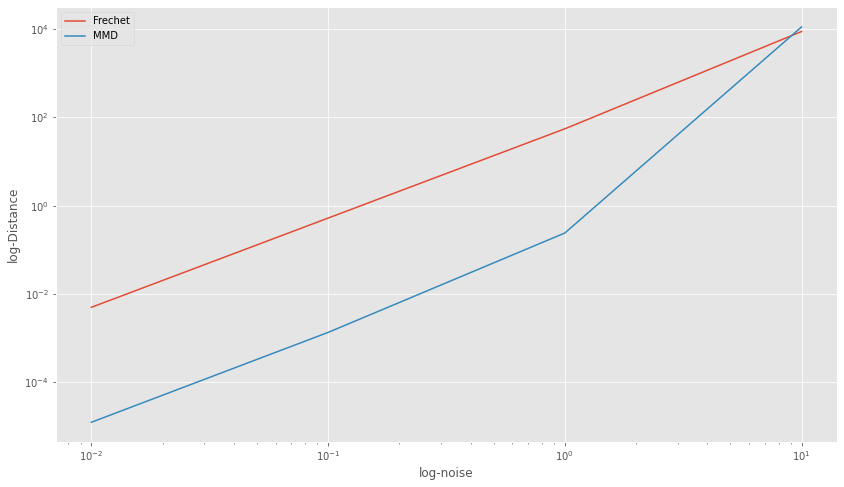

In [50]:
plt.figure(figsize=(14, 8))
plt.loglog(noise_range, frechets, label='Frechet')
plt.loglog(noise_range, mmds, label='MMD')
plt.xlabel('log-noise')
plt.ylabel('log-Distance')
plt.legend()
plt.show()

MMD converges to zero faster for similar matrices

### Frechet is a little biased even for exactly equal inputs, MMD is unbiased

In [56]:
n, d = 1000, 100
X =  torch.randn((n, d))
Y = X 
fd = FrechetDistance.distance(X, Y)
mmd = MMD.distance(X, Y)
print(f'FID is {fd}, MMD is {mmd}')

FID is -1.4210854715202004e-13, MMD is 0.0
